# Análisis de Sismos en México
Información desde 1900 hasta Febrero 12 de 2025

In [ ]:
# Importar librerias para la manipulación de datos y visualización

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

Lectura del DataSet por medio de Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

mainpath = "/content/drive/My Drive/Colab Notebooks/Bases de Datos Avanzadas/DataSets/"
filename = "SSNMX_catalogo_19000101_20250213.csv"
fullpath = os.path.join(mainpath, filename)

data = pd.read_csv(fullpath)

Mounted at /content/drive


<ipython-input-4-5a5f2793c9e5>:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(fullpath)


## Análisis Exploratorio de Datos

In [ ]:
data.head()

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,1900-01-20,00:33:30,7.4,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,06:33:30,revisado
1,1900-05-16,14:12:00,6.9,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,20:12:00,revisado
2,1901-03-05,04:45:00,6.9,25.00,-110.00,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,10:45:00,revisado
3,1901-12-08,20:17:00,7.0,26.00,-110.00,33.0,"83 km al OESTE de AHOME, SIN",1901-12-09,02:17:00,revisado
4,1902-01-16,17:19:00,7.0,17.62,-99.72,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",1902-01-16,23:19:00,revisado


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332398 entries, 0 to 332397
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Fecha                       332398 non-null  object 
 1   Hora                        332391 non-null  object 
 2   Magnitud                    332391 non-null  object 
 3   Latitud                     332391 non-null  float64
 4   Longitud                    332391 non-null  float64
 5   Profundidad                 332391 non-null  float64
 6   Referencia de localizacion  332391 non-null  object 
 7   Fecha UTC                   332391 non-null  object 
 8   Hora UTC                    332391 non-null  object 
 9   Estatus                     332391 non-null  object 
dtypes: float64(3), object(7)
memory usage: 25.4+ MB


In [ ]:
data.describe()

,Latitud,Longitud,Profundidad
count,332391.000000,332391.00000,332391.000000
mean,18.033864,-99.37387,32.030894
std,4.229140,5.99640,36.170389
min,10.271000,-120.59500,0.000000
25%,15.931300,-101.76400,10.000000
50%,16.567300,-98.08920,16.100000
75%,18.154700,-94.91020,37.300000
max,38.092300,-85.54670,338.000000


In [ ]:
data.columns

Index(['Fecha', 'Hora', 'Magnitud', 'Latitud', 'Longitud', 'Profundidad',
       'Referencia de localizacion', 'Fecha UTC', 'Hora UTC', 'Estatus'],
      dtype='object')

Matriz de correlación

             Magnitud   Latitud  Longitud  Profundidad
Magnitud     1.000000 -0.234713  0.308186     0.186817
Latitud     -0.234713  1.000000 -0.912859    -0.197755
Longitud     0.308186 -0.912859  1.000000     0.377705
Profundidad  0.186817 -0.197755  0.377705     1.000000


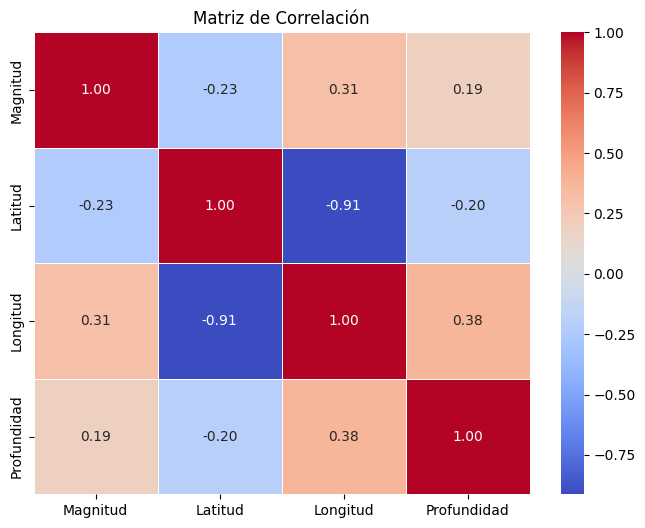

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo columnas numéricas
columnas_numericas = ['Magnitud', 'Latitud', 'Longitud', 'Profundidad']

# Convertir a número, forzando errores a NaN
for col in columnas_numericas:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convierte valores no numéricos en NaN

# Eliminar filas con valores NaN
df_numeric = data[columnas_numericas].dropna()

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

# Visualizar la matriz con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


Análisis y gráficas

In [ ]:
data['Profundidad'].unique()

array([ 33. ,  25. ,  10. , ..., 240.2, 237.7,   nan])

Copiar el dataset original para evitar cargarlo de nuevo

In [ ]:
data2 = data.copy()

In [ ]:
data2

,Fecha,Hora,Magnitud,Latitud,Longitud,Profundidad,Referencia de localizacion,Fecha UTC,Hora UTC,Estatus
0,1900-01-20,00:33:30,7.4,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-01-20,06:33:30,revisado
1,1900-05-16,14:12:00,6.9,20.00,-105.00,33.0,"71 km al NOROESTE de AUTLAN DE NAVARRO, JAL",1900-05-16,20:12:00,revisado
2,1901-03-05,04:45:00,6.9,25.00,-110.00,33.0,"100 km al NORESTE de LA PAZ, BCS",1901-03-05,10:45:00,revisado
3,1901-12-08,20:17:00,7.0,26.00,-110.00,33.0,"83 km al OESTE de AHOME, SIN",1901-12-09,02:17:00,revisado
4,1902-01-16,17:19:00,7.0,17.62,-99.72,33.0,"21 km al OESTE de ZUMPANGO DEL RIO, GRO",1902-01-16,23:19:00,revisado
...,...,...,...,...,...,...,...,...,...,...
332393,Los registros con estatus verificado son los c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332394,Los registros obtienen estatus revisado cuando...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332395,Esta informacion puede ser reproducida con fin...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332396,Consulta nuestro Aviso Legal y Terminos de Uso...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


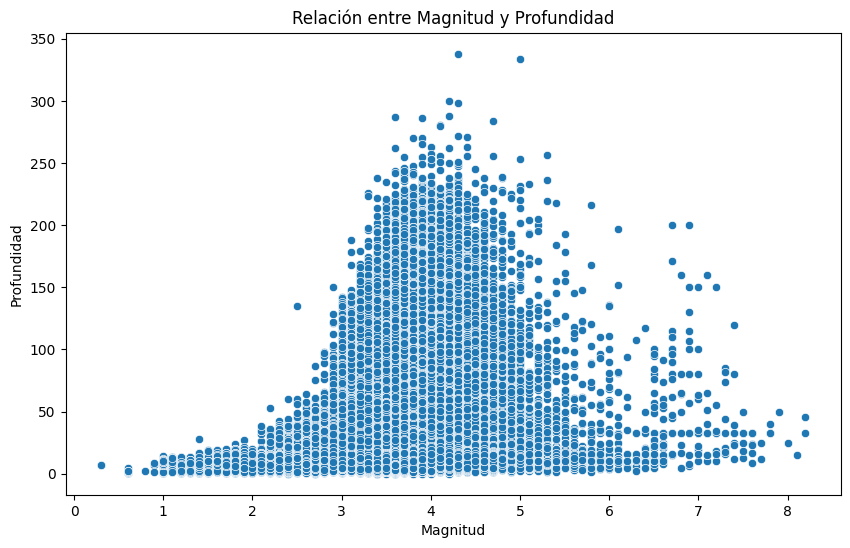

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Magnitud', y='Profundidad', data=data2)
plt.title('Relación entre Magnitud y Profundidad')
plt.xlabel('Magnitud')
plt.ylabel('Profundidad')
plt.show()

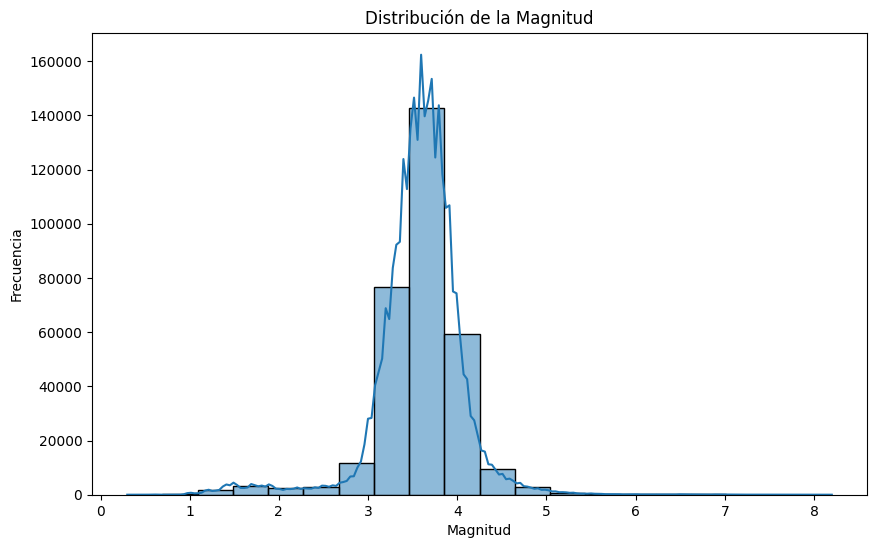

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data2['Magnitud'], kde=True, bins=20)
plt.title('Distribución de la Magnitud')
plt.xlabel('Magnitud')
plt.ylabel('Frecuencia')
plt.show()

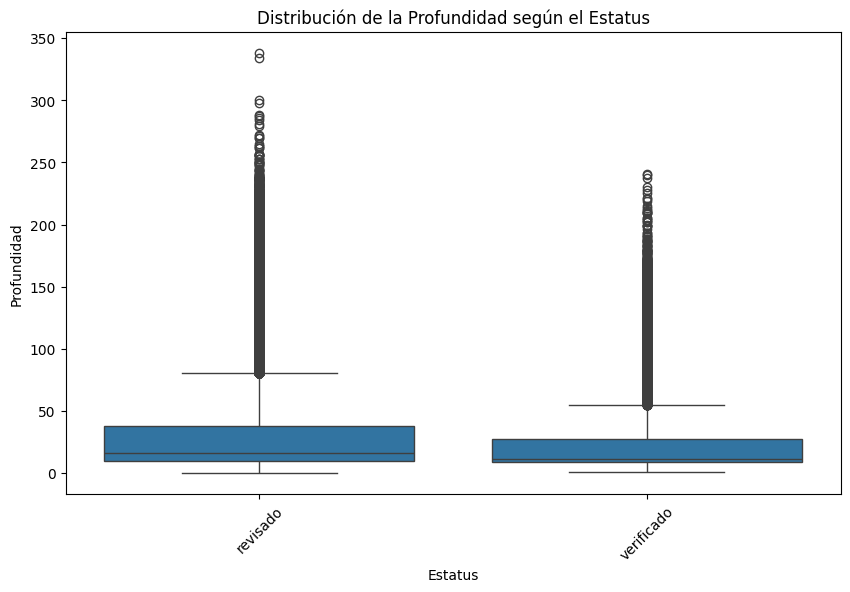

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Estatus', y='Profundidad', data=data)
plt.title('Distribución de la Profundidad según el Estatus')
plt.xlabel('Estatus')
plt.ylabel('Profundidad')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir 'Latitud' y 'Longitud' a numéricas, ignorando errores
data2['Latitud'] = pd.to_numeric(data2['Latitud'], errors='coerce')
data2['Longitud'] = pd.to_numeric(data2['Longitud'], errors='coerce')

# Eliminar filas con valores NaN en 'Latitud' y 'Longitud'
data2 = data2.dropna(subset=['Latitud', 'Longitud'])

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.kdeplot(
    x=data2['Longitud'],
    y=data2['Latitud'],
    cmap="Reds",  # Puedes cambiar la paleta de colores
    shade=True,  # Para rellenar las áreas de densidad
    cbar=True,  # Para mostrar la barra de color
)
plt.title('Densidad de Sismos en México')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

<ipython-input-76-08895ba5ee06>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


<ipython-input-23-8b706c7aaaac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Año'] = pd.to_datetime(data2['Fecha']).dt.year


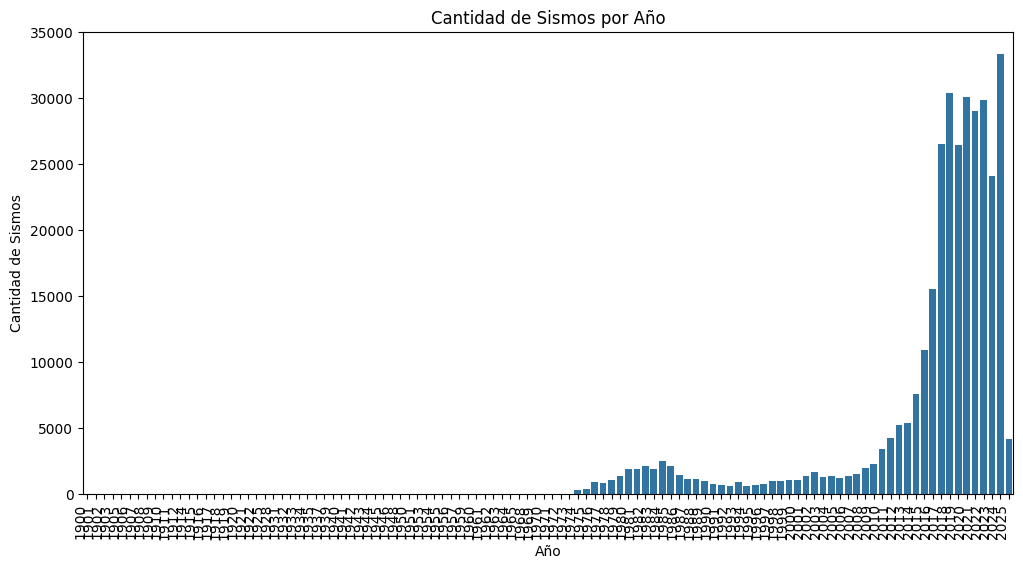

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data2['Fecha'] = pd.to_datetime(data2['Fecha'], errors='coerce')
data2 = data2.dropna(subset=['Fecha'])
data2['Año'] = pd.to_datetime(data2['Fecha']).dt.year

# Agrupar por año y contar la cantidad de sismos
sismos_por_año = data2.groupby('Año')['Año'].count().reset_index(name='Cantidad')

plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x='Año', y='Cantidad', data=sismos_por_año)
plt.title('Cantidad de Sismos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Sismos')
plt.xticks(rotation=90, ha='right')  # Rota las etiquetas del eje x para mayor legibilidad
plt.show()